# Project Overview
Our project aims to replicate and validate the key findings from paper "Rediscover Predictability: Information from the Relative 
Prices of Long-term and Short-term Dividends", focusing on the calculation of price ratio  `pr_t`and log price-dividend ratio  `pd_t`, and replicating Table 1 and Table 2 presented in the papert. This Jupyter Notebook aims to provide a brief walkthrough of the data science process involved in our project, from data loading and cleaning to analysis and visualization.

In [1]:
# Importing necessary libraries
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Adding the scripts directory to the path for importing modules
sys.path.insert(1, "./src/")

# Directories based on config.py
DATA_DIR = Path(config.DATA_DIR)
OUTPUT_DIR = Path(config.OUTPUT_DIR)

## Data Loading
In this section, we load S&P 500 future data from Bloomberg and zero-coupon yields from the Federal Reserve.

In load_zero_coupon.py, we write functions to load the zero coupon yield curve from the Federal Reserve using the url "https://www.federalreserve.gov/data/yield-curve-tables/feds200628.csv", which provides the published data using Gurkaynak, Sack, and Wright (2007) model. It saves the pulled raw data to a parquet file for future use.
Functions to load the raw/clean data from the parquet file are also provided for future use.

In [2]:
from load_zero_coupon import pull_fed_yield_curve
# Load zero coupon yield curve
zc_df = pull_fed_yield_curve()

In [3]:
zc_df

,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,SVENY10,...,SVENY21,SVENY22,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30
Date,,,,,,,,,,,,,,,,,,,,,
1961-06-14,2.9825,3.3771,3.5530,3.6439,3.6987,3.7351,3.7612,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-15,2.9941,3.4137,3.5981,3.6930,3.7501,3.7882,3.8154,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-16,3.0012,3.4142,3.5994,3.6953,3.7531,3.7917,3.8192,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-19,2.9949,3.4386,3.6252,3.7199,3.7768,3.8147,3.8418,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-20,2.9833,3.4101,3.5986,3.6952,3.7533,3.7921,3.8198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,4.8898,4.4783,4.2429,4.1136,4.0489,4.0239,4.0230,4.0367,4.0591,4.0861,...,4.3408,4.3521,4.3614,4.3687,4.3743,4.3782,4.3805,4.3813,4.3807,4.3788
2024-03-12,4.9375,4.5474,4.3174,4.1874,4.1202,4.0924,4.0893,4.1015,4.1227,4.1490,...,4.3972,4.4073,4.4153,4.4213,4.4255,4.4279,4.4286,4.4278,4.4256,4.4220
2024-03-13,4.9468,4.5717,4.3474,4.2190,4.1518,4.1235,4.1199,4.1318,4.1528,4.1791,...,4.4274,4.4372,4.4449,4.4505,4.4541,4.4560,4.4562,4.4547,4.4518,4.4475


In load_bbg_data.py, we create functions to load the S&P 500 index, dividend yields, and all active futures during the given period from Bloomberg. It then saves the pulled raw data to separate parquet files for future use. Functions to load the raw/clean data from the parquet file are also provided for future use.

In [4]:
from load_bbg_data import load_bbg_data
# Load Bloomberg data including S&P 500 index, dividend yields and futures
bbg_df, future_df, maturity_df = load_bbg_data(DATA_DIR)

In [5]:
bbg_df

,dividend yield,index
Date,,
1988-01-29,3.4909,257.07
1988-02-29,3.3508,267.82
1988-03-31,3.4544,258.89
1988-04-29,3.5415,261.33
1988-05-31,3.5303,262.16
...,...,...
2021-05-31,1.3725,4204.11
2021-06-30,1.3537,4297.50
2021-07-30,1.3282,4395.26


In [6]:
future_df

,INDEX,SPF88 INDEX,SPG88 INDEX,SPH88 INDEX,SPJ88 INDEX,SPK88 INDEX,SPM88 INDEX,SPN88 INDEX,SPQ88 INDEX,SPU88 INDEX,...,SPH24 INDEX,SPJ24 INDEX,SPK24 INDEX,SPM24 INDEX,SPN24 INDEX,SPQ24 INDEX,SPU24 INDEX,SPV24 INDEX,SPX24 INDEX,SPZ24 INDEX
Date,,,,,,,,,,,,,,,,,,,,,
1988-01-29,257.07,NaN,NaN,257.05,NaN,NaN,258.55,NaN,NaN,260.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-02-29,267.82,NaN,NaN,267.30,NaN,NaN,268.75,NaN,NaN,270.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-31,258.89,NaN,NaN,270.65,NaN,NaN,259.05,NaN,NaN,260.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-04-29,261.33,NaN,NaN,NaN,NaN,NaN,261.00,NaN,NaN,262.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-05-31,262.16,NaN,NaN,NaN,NaN,NaN,262.95,NaN,NaN,264.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,4204.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4063.3
2021-06-30,4297.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4225.1
2021-07-30,4395.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4308.3


## Data Cleaning
In this section, we clean the raw data from Bloomberg and the Federal Reserve, making them suitable for further analysis. 

In clean_data.py, 1-year expiry future prices throughout the period are interpolated from the active futures data.

In [7]:
from clean_data import clean_bbg_data
# Clean Bloomberg data
bbg_df_cleaned = clean_bbg_data(config.PAPER_END_DT, DATA_DIR)

In [8]:
bbg_df_cleaned

,dividend yield,index,futures
Date,,,
1988-01-29,3.4909,257.07,262.088828
1988-02-29,3.3508,267.82,272.033191
1988-03-31,3.4544,258.89,263.800000
1988-04-29,3.5415,261.33,267.626496
1988-05-31,3.5303,262.16,268.784259
...,...,...,...
2017-02-28,1.9894,2363.64,2349.859322
2017-03-31,1.9688,2362.72,2352.200000
2017-04-28,1.9596,2384.20,2374.385185


For 1-year zero-coupon bond yield data, we fill in missing values with the closest date's value, and select the yield data corresponding to the Bloomberg dates. We further save the discount factors to a parquet file for future use.

In [9]:
from clean_data import clean_one_year_zc
# Clean 1-year zero-coupon bond yield data
one_year_zc_df = clean_one_year_zc(bbg_df_cleaned.index, config.PAPER_END_DT, data_dir=DATA_DIR)

In [10]:
one_year_zc_df

,1_year_yield,1_y_dis_factor
Date,,
1988-01-29,6.776967,0.934476
1988-02-29,6.636113,0.935793
1988-03-31,6.845873,0.933832
1988-04-29,7.098072,0.931480
1988-05-31,7.642272,0.926425
...,...,...
2017-02-28,0.916400,0.990878
2017-03-31,1.055100,0.989504
2017-04-28,1.119100,0.988871


## Calculating `pr_t` and `pd_t`
We calculate `pr_t` (price ratio) and `pd_t` (log price-dividend ratio) from previously cleaned data as key metrics for our analysis, following the methodologies outlined in the paper and using the `create_tables.py` script.

In [11]:
from create_tables import calc_pr, calc_pd
# Calculate pr_t and pd_t
pr_t = calc_pr(bbg_df_cleaned, one_year_zc_df)
pd_t = calc_pd(bbg_df_cleaned)

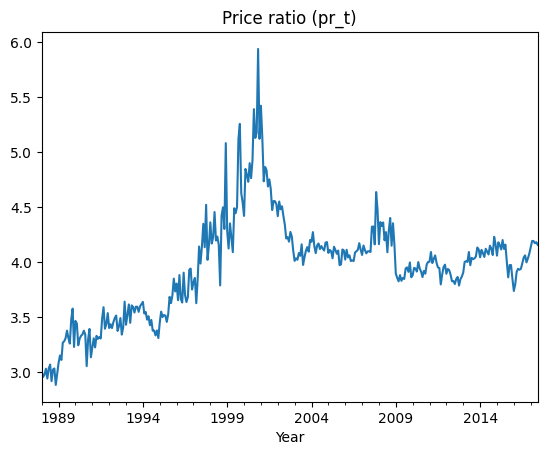

In [12]:
ax = pr_t.plot()
ax.set_title('Price ratio (pr_t)')
ax.set_xlabel('Year')
plt.show()

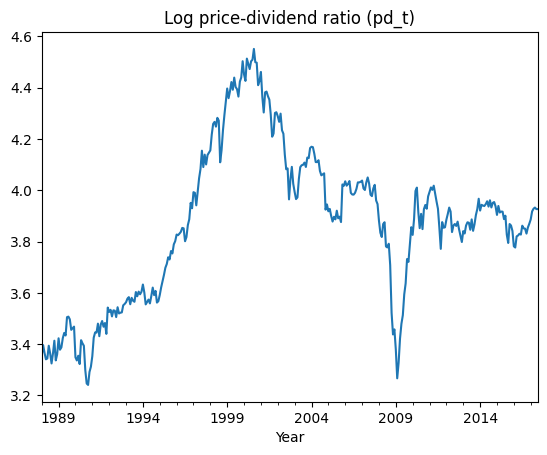

In [13]:
ax = pd_t.plot()
ax.set_title('Log price-dividend ratio (pd_t)')
ax.set_xlabel('Year')
plt.show()

## Replicating Tables
This section focuses on replicating Table 1 and Table 2 from the paper, involving data visualization techniques to accurately reproduce the results and provide insights.

In [14]:
from create_tables import calc_table_1, calc_table_2
table_1 = calc_table_1(pr_t, pd_t)
table_2 = calc_table_2(bbg_df_cleaned['index'], pr_t, pd_t)

Table 1 is a statistical summary of pr_t, pd_t.

In [15]:
table_1

,obs,mean,std,min,25%,50%,75%,max,ρ,Correlation
pr,354,3.948,0.464,2.883,3.620,4.002,4.158,5.938,0.939,0.878
pd,354,3.868,0.304,3.241,3.602,3.887,4.034,4.551,0.990,0.878


Table 2 reports the results of the regression that predicts the 12-month S&P 500 index return via pr_t, pd_t, and their residuals after projecting on each other.

In [25]:
table_2 = table_2.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
table_2

,pr_t,pd_t,epsilon_pr_t,epsilon_pd_t
beta,-0.117,-0.121,-0.292,0.301
R^2,0.006,0.106,0.074,0.076
OOS R^2,0.312,0.168,0.287,0.286


## Summary Statistics
In this section, we generate and discuss summary statistics for 5 source data: S&P500 index, dividend
yield, 1-year future price, 1-year zero-coupon yields, and the corresponding discounting facto. This process  proviesg insights into data's underlying patterns and distributions, which are crucial for understanding the replication process.

In [17]:
from create_summary_stats import summary_stats
summary_stats_df = summary_stats(bbg_df_cleaned['dividend yield'], bbg_df_cleaned['index'], bbg_df_cleaned['futures'], 
                                 one_year_zc_df['1_year_yield'], one_year_zc_df['1_y_dis_factor'])

In [18]:
summary_stats_df

,obs,mean,std,min,25%,50%,75%,max,ρ
dividend yield,354,2.187,0.666,1.056,1.770,2.051,2.727,3.914,0.988
index,354,1076.526,542.016,257.070,536.238,1117.885,1379.128,2423.410,0.996
futures,354,1085.999,536.425,262.089,551.294,1126.150,1391.228,2416.300,0.996
1_year_yield,354,3.489,2.637,0.099,0.663,3.655,5.542,9.658,0.996
1_y_dis_factor,354,0.966,0.025,0.908,0.946,0.964,0.993,0.999,0.996
